In [1]:
import numpy as np
import pandas as pd

In [5]:
USA=pd.read_excel('../data/usa.xlsx')
USA.mean()

708.27    674.782231
dtype: float64

### 消费端预测——工业用氢

In [2]:
industryGDP=pd.read_excel("../data/consumption_potential/industry GDP of province.xlsx",index_col=0)#单位：亿元

In [3]:
industryGDP

,2021,2022
province,,
Hebei,14132.3,14675.3
Shanxi,10543.6,12758.6
Liaoning,9386.5,10239.1
Jilin,3839.5,3737.9
Jiangsu,45730.7,48593.6
Zhejiang,26996.0,28871.3
Anhui,12790.8,13792.0
Fujian,18292.8,19628.8
Jiangxi,10862.9,11770.3


补上香港，澳门，台湾的数据

In [4]:
industryGDP.loc['Hong Kong',2022]=2568.61*0.063 #总GDP*工业GDP占比，https://data.worldbank.org.cn/indicator/nv.ind.totl.zs?locations=HK， 单位：10亿人民币
industryGDP.loc['Hong Kong',2021]=2633.35*0.06
industryGDP.loc['Macao',2022]=0
industryGDP.loc['Macao',2021]=0
industryGDP.loc['Taiwan',2022]=  5543.52*0.378     #774.70十亿美元  37.8%
industryGDP.loc['Taiwan',2021]=  4789.31*0.378          #669.30

In [5]:
industryGDP.columns

Index([2021, 2022], dtype='int64')

In [6]:
industryGDP["industryGDP_ratio"]=(industryGDP[2021]/industryGDP[2021].sum()).values+(industryGDP[2022]/industryGDP[2022].sum()).values
industryGDP

,2021,2022,industryGDP_ratio
province,,,
Hebei,14132.30000,14675.30000,0.074416
Shanxi,10543.60000,12758.60000,0.060032
Liaoning,9386.50000,10239.10000,0.050653
Jilin,3839.50000,3737.90000,0.019596
Jiangsu,45730.70000,48593.60000,0.243560
Zhejiang,26996.00000,28871.30000,0.144242
Anhui,12790.80000,13792.00000,0.068623
Fujian,18292.80000,19628.80000,0.097903
Jiangxi,10862.90000,11770.30000,0.058422


In [7]:
sorted_industryGDP=industryGDP.sort_values(by="industryGDP_ratio",ascending=False)
sorted_industryGDP['industryGDP_ratio']=sorted_industryGDP['industryGDP_ratio']*100

法2算工业用氢需求

In [2]:
#甲醇产能
methanol=pd.read_csv("../data/consumption_potential/methanol.csv",index_col=0)
methanol['ratio']=methanol['2018']/methanol['2018'].sum()
methanol

,2018,ratio
province,,
Jiangsu,34,0.008070
Guangdong,0,0.000000
Zhejiang,10,0.002374
Shandong,650,0.154284
Fujian,10,0.002374
Henan,312,0.074056
Hubei,31,0.007358
Sichuan,57,0.013530
Hunan,0,0.000000


In [3]:
#氨产能
ammonia=pd.read_csv("../data/consumption_potential/ammonia.csv",index_col=0)
ammonia['ratio']=ammonia['2021']/ammonia['2021'].sum()
ammonia

,2021,ratio
province,,
Jiangsu,342.10,0.069030
Guangdong,4.70,0.000948
Zhejiang,4.20,0.000847
Shandong,590.40,0.119133
Fujian,68.20,0.013762
Henan,512.60,0.103434
Hubei,415.48,0.083837
Sichuan,348.65,0.070352
Hunan,116.80,0.023568


In [4]:
oil=pd.read_csv("../data/consumption_potential/oil.csv",index_col=0)
oil['ratio']=oil['2017']/oil['2017'].sum()
oil

,2017,ratio
province,,
Jiangsu,5.89,0.059967
Guangdong,9.43,0.096009
Zhejiang,4.65,0.047343
Shandong,19.49,0.198432
Fujian,4.12,0.041947
Henan,1.54,0.015679
Hubei,2.79,0.028406
Sichuan,1.35,0.013745
Hunan,1.81,0.018428


In [5]:
steel=pd.read_csv("../data/consumption_potential/steel.csv",index_col=0)
steel['ratio']=steel['2023']/steel['2023'].sum()
steel

,2023,ratio
province,,
Jiangsu,11241.91,0.115403
Guangdong,3383.62,0.034734
Zhejiang,1317.46,0.013524
Shandong,6909.13,0.070925
Fujian,3057.20,0.031384
Henan,2994.88,0.030744
Hubei,3343.74,0.034325
Sichuan,2487.39,0.025534
Hunan,2234.94,0.022943


In [6]:
hydrogen=[1060,1520,250,1000]
hydrogen_demand_ratio=hydrogen/np.sum(hydrogen)
hydrogen_demand_ratio

array([0.2767624 , 0.39686684, 0.06527415, 0.26109661])

In [7]:
industry_ratio=methanol['ratio']*hydrogen_demand_ratio[0]+ammonia['ratio']*hydrogen_demand_ratio[1]+oil['ratio']*hydrogen_demand_ratio[2]+steel['ratio']*hydrogen_demand_ratio[3]
industry_ratio=industry_ratio.sort_values(ascending=False)
industry_ratio


province
Shandong          0.121451
Shanxi            0.092548
Hebei             0.082539
Henan             0.070596
Jiangsu           0.063675
Inner Mongolia    0.057559
Shaanxi           0.048861
Ningxia           0.047855
Hubei             0.046125
Sichuan           0.039229
Anhui             0.032888
Liaoning          0.031641
Chongqing         0.028030
Yunnan            0.027713
Xinjiang          0.026331
Guangxi           0.019752
Guizhou           0.017904
Fujian            0.017051
Hunan             0.016547
Guangdong         0.015712
Hainan            0.012462
Shanghai          0.012318
Heilongjiang      0.011625
Gansu             0.010119
Taiwan            0.009901
Tianjin           0.009343
Jiangxi           0.008574
Jilin             0.007725
Zhejiang          0.007615
Qinghai           0.004904
Beijing           0.001409
Tibet             0.000000
Hong Kong         0.000000
Macao             0.000000
Name: ratio, dtype: float64

In [8]:
industry_ratio.sum()

1.0

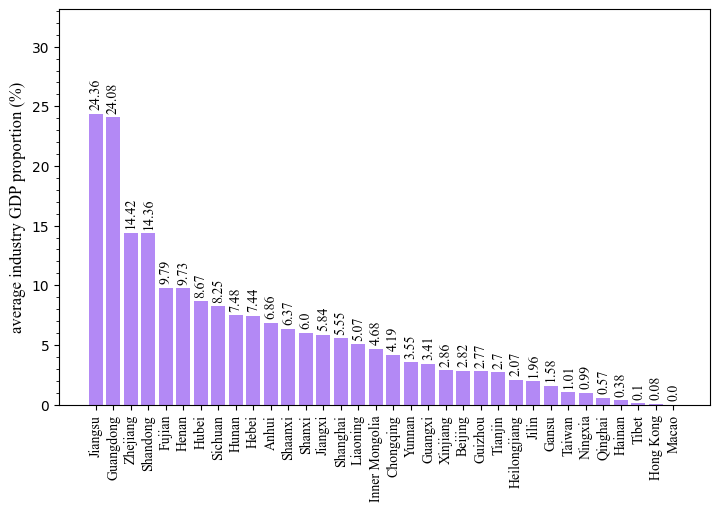

In [26]:
import matplotlib.pyplot as plt
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(7.083, 5), layout='constrained')
x=range(len(sorted_industryGDP))  # 确定柱状图数量,可以认为是x方向刻度
y=round(sorted_industryGDP['ratio'],2)  # y方向刻度
ax.set_xticks(range(len(sorted_industryGDP)), sorted_industryGDP.index,rotation='vertical',fontsize=10,fontname='Times New Roman')
plt.yticks(fontsize=10)
ax.bar(x, y,color='#b389f5')  # 绘制y刻度标签  风能：#a7e2b7  太阳能：#fffc54 核能：'#e2c9a7' 水能：#a7cae2  上限：#ffbfbf
ax.set_ylabel(r'average industry GDP proportion (%)',fontsize=12,fontname='Times New Roman')  # y轴标签
# 在每个柱子上方添加数值
for i, v in enumerate(y):
    ax.text(i, v + 0.6, str(v), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
#设置网格刻度
ax.minorticks_on()
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
plt.ylim(0, max(y) * 1.36)
plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/consumption/industryGDP.svg')  # 保存为SVG格式
plt.show()

### 消费端预测——交通用氢  


In [19]:
freight=pd.read_excel("../data/consumption_potential/freight volume of province.xlsx",index_col=0)#单位：万吨

In [20]:
freight.columns  #单位：万吨

Index([2021, 2022], dtype='int64')

In [45]:
set(industryGDP.index)-set(freight.index)

{'Hong Kong', 'Macao', 'Taiwan'}

In [21]:
freight.loc['Hong Kong',2022]=420
freight.loc['Hong Kong',2021]=420
freight.loc['Macao',2022]=0.4223*12
freight.loc['Macao',2021]=0.4223*12
freight.loc['Taiwan',2022]=4079*12 
#https://www.bing.com/search?q=台湾的货运量&qs=n&form=QBRE&sp=-1&lq=0&pq=台湾的货运量&sc=0-6&sk=&cvid=CA158D140F1A4FDBBFC7DAA9E2F4685B&ghsh=0&ghacc=0&ghpl=
freight.loc['Taiwan',2021]=4079*12
freight.columns

Index([2021, 2022], dtype='int64')

In [22]:
freight["freight_ratio"]=0.5*((freight[2021]/freight[2021].sum()).values+(freight[2022]/freight[2022].sum()).values)
freight

,2021,2022,freight_ratio
province,,,
Hebei,227203.0000,196727.0000,0.054815
Shanxi,114698.0000,107024.0000,0.028697
Liaoning,152596.0000,139403.0000,0.037783
Jilin,47675.0000,40813.0000,0.011440
Jiangsu,186708.0000,159936.0000,0.044816
Zhejiang,213653.0000,205935.0000,0.054330
Anhui,259044.0000,245982.0000,0.065380
Fujian,110777.0000,106939.0000,0.028191
Jiangxi,181024.0000,178366.0000,0.046548


In [23]:
sorted_freight=freight.sort_values(by="freight_ratio",ascending=False)
sorted_freight['freight_ratio']=sorted_freight['freight_ratio']*100

In [24]:
sorted_freight.to_csv('../data/consumption_potential/freight_ratio.csv')

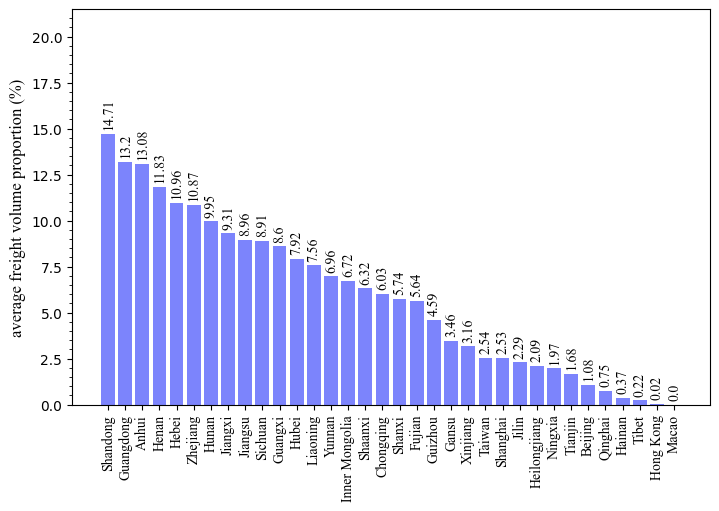

In [39]:
import matplotlib.pyplot as plt
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(7.083, 5), layout='constrained')
x=range(len(sorted_freight))  # 确定柱状图数量,可以认为是x方向刻度
y=round(sorted_freight['ratio'],2)  # y方向刻度
ax.set_xticks(range(len(sorted_freight)), sorted_freight.index,rotation='vertical',fontsize=10,fontname='Times New Roman')
plt.yticks(fontsize=10)
ax.bar(x, y,color='#7c84fc')  # 绘制y刻度标签  风能：#a7e2b7  太阳能：#fffc54 核能：'#e2c9a7' 水能：#a7cae2  上限：#ffbfbf
ax.set_ylabel(r'average freight volume proportion (%)',fontsize=12,fontname='Times New Roman')  # y轴标签
# 在每个柱子上方添加数值
for i, v in enumerate(y):
    ax.text(i, v + 0.4, str(v), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
#设置网格刻度
ax.minorticks_on()
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
plt.ylim(0, max(y) * 1.46)
plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/consumption/freight.svg')  # 保存为SVG格式
plt.show()

自上而下分配

In [25]:
total=1.3e11      #中国2060氢需求预测量1.3亿吨/8580万吨   单位：kg
industry=1.3e11*0.7 #单位：kg
transport=1.3e11*0.3 #单位：kg


In [23]:
industryGDP.index==freight.index #顺序一致

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [26]:
freight=pd.read_csv('../data/consumption_potential/freight_ratio.csv',index_col=0)
freight['freight_ratio'].sum()

100.0

In [11]:
from src.const import list_provincial_level

In [27]:
freight=freight['freight_ratio'].copy()/100
freight


province
Shandong          0.073547
Guangdong         0.065979
Anhui             0.065380
Henan             0.059150
Hebei             0.054815
Zhejiang          0.054330
Hunan             0.049775
Jiangxi           0.046548
Jiangsu           0.044816
Sichuan           0.044529
Guangxi           0.043020
Hubei             0.039623
Liaoning          0.037783
Yunnan            0.034792
Inner Mongolia    0.033604
Shaanxi           0.031592
Chongqing         0.030166
Shanxi            0.028697
Fujian            0.028191
Guizhou           0.022928
Gansu             0.017308
Xinjiang          0.015788
Taiwan            0.012682
Shanghai          0.012635
Jilin             0.011440
Heilongjiang      0.010443
Ningxia           0.009845
Tianjin           0.008395
Beijing           0.005377
Qinghai           0.003754
Hainan            0.001870
Tibet             0.001091
Hong Kong         0.000109
Macao             0.000001
Name: freight_ratio, dtype: float64

In [28]:
freight_reindex=freight.reindex(list_provincial_level)

In [14]:
industry_ratio_reindex=industry_ratio.reindex(list_provincial_level)

In [29]:
freight_reindex.sum()

1.0

In [ ]:
sorted_industryGDP.to_csv('../data/consumption_potential/industryGDP_ratio.csv')

In [30]:
hydrogen_demand=pd.DataFrame(industry*industry_ratio_reindex+transport*freight_reindex)
hydrogen_demand.columns=['hydrogen_demand']
hydrogen_demand['hydrogen_demand'].sum()

130000000000.0

In [31]:
hydrogen_demand.to_csv('../data/consumption_potential/hydrogen_demand_v2.csv')


NameError: name 'electricity_cost' is not defined

In [25]:
hydrogen_demand=industryGDP["industryGDP_ratio"]*industry+freight["freight_ratio"]*transport
hydrogen_demand.columns=["hydrogen_demand"]
hydrogen_demand.to_csv("../data/consumption_potential/hydrogen_demand.csv") #单位：kg


In [2]:
hydrogen_demand=pd.read_csv("../data/consumption_potential/hydrogen_demand.csv",index_col=0)
hydrogen_demand

,hydrogen_demand
province,
Hebei,1.104744e+10
Shanxi,7.701269e+09
Liaoning,7.556444e+09
Jilin,2.675593e+09
Jiangsu,2.565958e+10
Zhejiang,1.736370e+10
Anhui,1.134432e+10
Fujian,1.110804e+10
Jiangxi,8.947203e+09


In [3]:
prod_upper=pd.read_csv("../data/production_potential/production_upper.csv",index_col=0)
prod_upper

,0
province,
Anhui,1.214977e+10
Beijing,0.000000e+00
Chongqing,0.000000e+00
Fujian,1.600154e+10
Gansu,8.789401e+10
Guangdong,2.736980e+10
Guangxi,1.531217e+10
Guizhou,4.297274e+09
Hainan,1.071437e+10


In [4]:
demand_production=pd.concat([hydrogen_demand,prod_upper],axis=1)
demand_production

,hydrogen_demand,0
province,,
Hebei,1.104744e+10,1.943406e+10
Shanxi,7.701269e+09,8.086310e+09
Liaoning,7.556444e+09,1.380479e+10
Jilin,2.675593e+09,2.387686e+10
Jiangsu,2.565958e+10,7.803628e+09
Zhejiang,1.736370e+10,1.280351e+10
Anhui,1.134432e+10,1.214977e+10
Fujian,1.110804e+10,1.600154e+10
Jiangxi,8.947203e+09,5.774532e+09


In [5]:
demand_production.rename(columns={"0":"production potential"},inplace=True)
demand_production=demand_production/1e9

In [6]:
from src.const import region_dict
df_dict={}
for i,j in region_dict.items():
    
    df_dict[i]=demand_production.loc[j]
df_dict

    

{'NC':                 hydrogen_demand  production potential
 province                                             
 Beijing                2.988222              0.000000
 Tianjin                3.112205              0.000000
 Hebei                 11.047440             19.434064
 Shanxi                 7.701269              8.086310
 Inner Mongolia         6.879443            388.996799,
 'NEC':               hydrogen_demand  production potential
 province                                           
 Liaoning             7.556444             13.804786
 Jilin                2.675593             23.876856
 Heilongjiang         2.694175             41.551559,
 'CC':           hydrogen_demand  production potential
 province                                       
 Henan           13.471047             13.837308
 Hunan           10.691485              7.469621
 Hubei           10.978695             12.515274,
 'EC':           hydrogen_demand  production potential
 province                   

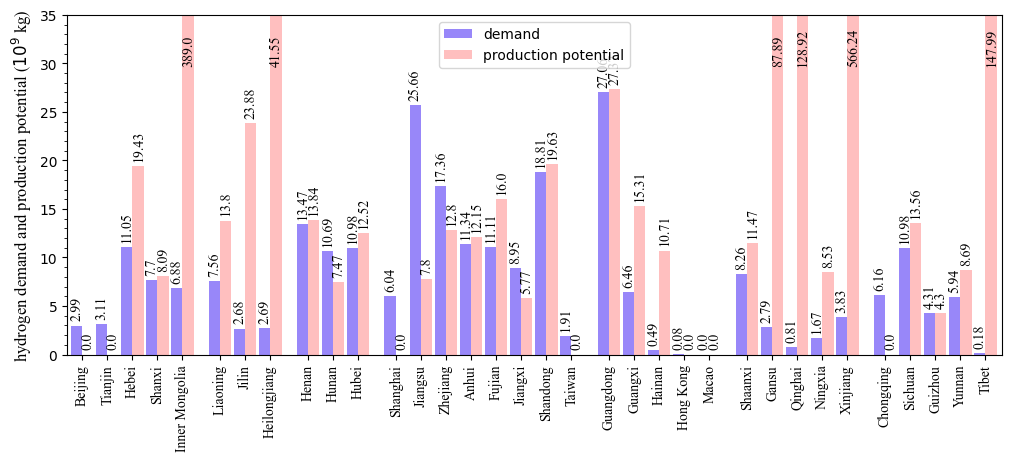

In [63]:
import matplotlib.pyplot as plt
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(10, 4.5), layout='constrained')
x_start=0
xticks=[]
xticks_label=[]
for i,j in df_dict.items():
    x=np.arange(x_start,x_start+2*len(j),2)  # 确定柱状图数量,可以认为是x方向刻度
    # 这是每个x坐标对应的第一组y值
    y1 =j["hydrogen_demand"]
    # 这是每个x坐标对应的第二组y值
    y2 = j["production potential"]
    # 柱子的宽度
    width = 0.9
    # 画第一组柱子，我们将x坐标向左移动一半的宽度
    ax.bar(x - width/2, y1, width, label='green hydrogen demand',color='#9887F9')
    # 画第二组柱子，我们将x坐标向右移动一半的宽度
    ax.bar(x + width/2, y2, width, label='green hydrogen production potential',color='#ffbfbf')
    xticks.extend(x)
    xticks_label.extend(j.index)
    

    # 在每个柱子上方添加数值
    for i, v in enumerate(y1):
        if v<30:
            ax.text(x[i]-width/2, v + 0.8, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
        else:
            ax.text(x[i]-width/2, 30, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
    for i, v in enumerate(y2):
        if v<30:
            ax.text(x[i]+width/2, v + 0.8, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
        else:
            ax.text(x[i]+width/2, 30, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',
            rotation='vertical')

    x_start=x_start+2*len(j)+1

ax.set_xticks(xticks, xticks_label,rotation='vertical',fontsize=10,fontname='Times New Roman')

ax.set_ylim(0, 35)
ax.set_xlim(-1.2, x_start-1.7)
ax.set_ylabel(r'hydrogen demand and production potential ($10^9$ kg)',fontsize=12,fontname='Times New Roman')  # y轴标签
ax.minorticks_on()
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.legend(['demand', 'production potential'])
plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/consumption/comparison_con_pro.svg')  # 保存为SVG格式
plt.show()

In [6]:
#按照氢气的生产上限减去需求的富裕程度进行排序画图，有正负，0轴

# 计算新的值
demand_production['difference'] = (demand_production['production potential'] - demand_production['hydrogen_demand']) / demand_production['hydrogen_demand']

demand_production

,hydrogen_demand,production potential,difference
province,,,
Hebei,11.047440,19.434064,0.759146
Shanxi,7.701269,8.086310,0.049997
Liaoning,7.556444,13.804786,0.826889
Jilin,2.675593,23.876856,7.923949
Jiangsu,25.659578,7.803628,-0.695879
Zhejiang,17.363703,12.803510,-0.262628
Anhui,11.344322,12.149770,0.071000
Fujian,11.108042,16.001541,0.440537
Jiangxi,8.947203,5.774532,-0.354599


In [7]:
demand_production.to_csv("../data/consumption_potential/demand_production_difference.csv")

In [23]:
sorted_difference_positive['Tibet']

835.5568241217875

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19580\1923426171.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


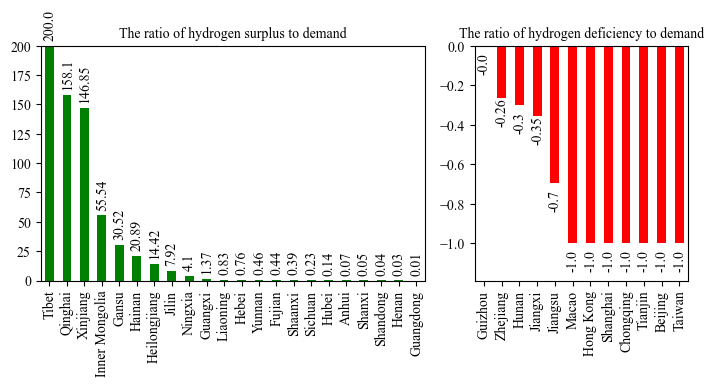

In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# 画柱状图
difference=demand_production['difference']
sorted_difference=difference.sort_values(ascending=False)
sorted_difference_positive=sorted_difference[sorted_difference>0]
sorted_difference_negative=sorted_difference[sorted_difference<0]
#修改西藏的值，后续再figmap中修改
sorted_difference_positive['Tibet']=200

# 画0轴
fig= plt.figure(figsize=(7.083, 4), layout='constrained')
gs = gridspec.GridSpec(1, 2, width_ratios=[1.8, 1]) 

ax0 = plt.subplot(gs[0])
sorted_difference_positive.plot(kind='bar',color='g',ax=ax0) #label='Hydrogen-rich provinces'
# plt.legend(prop={'family': 'Times New Roman', 'size': 10},loc='upper right')
ax0.set_title('The ratio of hydrogen surplus to demand',fontsize=10,fontname='Times New Roman')
# 在每个柱子上方添加数值
for i, v in enumerate(sorted_difference_positive.values):
    ax0.text(i, v + 7, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
ax0.set_ylim(0, 200)
# ax0.set_xlabel('provinces with hydrogen suplus', fontsize=10, fontname='Times New Roman')  # 修改第一个子图x轴的标签
ax0.set_xlabel('')
# 创建第二个子图
ax1 = plt.subplot(gs[1])
sorted_difference_negative.plot(kind='bar',color='r',ax=ax1) #label='Hydrogen-deficient provinces'
# plt.legend(prop={'family': 'Times New Roman', 'size': 10},loc='upper right')
ax1.set_title('The ratio of hydrogen deficiency to demand',fontsize=10,fontname='Times New Roman')
for i, v in enumerate(sorted_difference_negative.values):
    ax1.text(i, v - 0.13, str(round(v,2)), ha='center', fontsize=10, fontname='Times New Roman',rotation='vertical')
ax1.set_ylim(-1.19, 0)
# ax1.set_xlabel('provinces with hydrogen deficiency', fontsize=10, fontname='Times New Roman')  # 修改第一个子图x轴的标签
ax1.set_xlabel('')
# 设置x轴刻度标签的字体
for tick in ax0.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(10)
for tick in ax1.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(10)
for tick in ax0.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(10)
for tick in ax1.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(10)

# 自动调整子图间距
plt.tight_layout()
plt.savefig('C:/Users/ASUS/Documents/research/hydrogen production/publication/Figure/consumption/difference_ratio.svg')  # 保存为SVG格式
# 显示图形
plt.show()


In [32]:
plt.savefig("../publication/Figure/consumption/proportion_comparision.svg", format='svg')

<Figure size 640x480 with 0 Axes>